### Look for a SpectroAstrometry signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
%matplotlib inline

In [2]:
# load atmospheric transmission file (R=3000 resolution)
path = '/Users/jpw/idl/Spextool/data/'
file = 'atran75000'
hdu = fits.open(path+file+'.fits')
tdata = hdu[0].data
atrans = interpolate.interp1d(tdata[0,:], tdata[1,:])

In [3]:
# load in each slit PA
path = '../240106/reduced/'
hdu = fits.open(path+'DLTau_PA232.fits')

source = 'DLTau'
PA1 = 52
PA2 = PA1 + 180

#source = 'DFTau'
#source = 'FZTau'
#source = 'HLTau'
#PA1 = 138
#PA2 = PA1 + 180

hdu1 = fits.open(path+'c'+source+'_PA'+str(PA1)+'.fits')
data1 = hdu1[0].data
hd1 = hdu1[0].header
hdu1.close()
hdu2 = fits.open(path+'c'+source+'_PA'+str(PA2)+'.fits')
data2 = hdu2[0].data
hd2 = hdu2[0].header
hdu2.close()

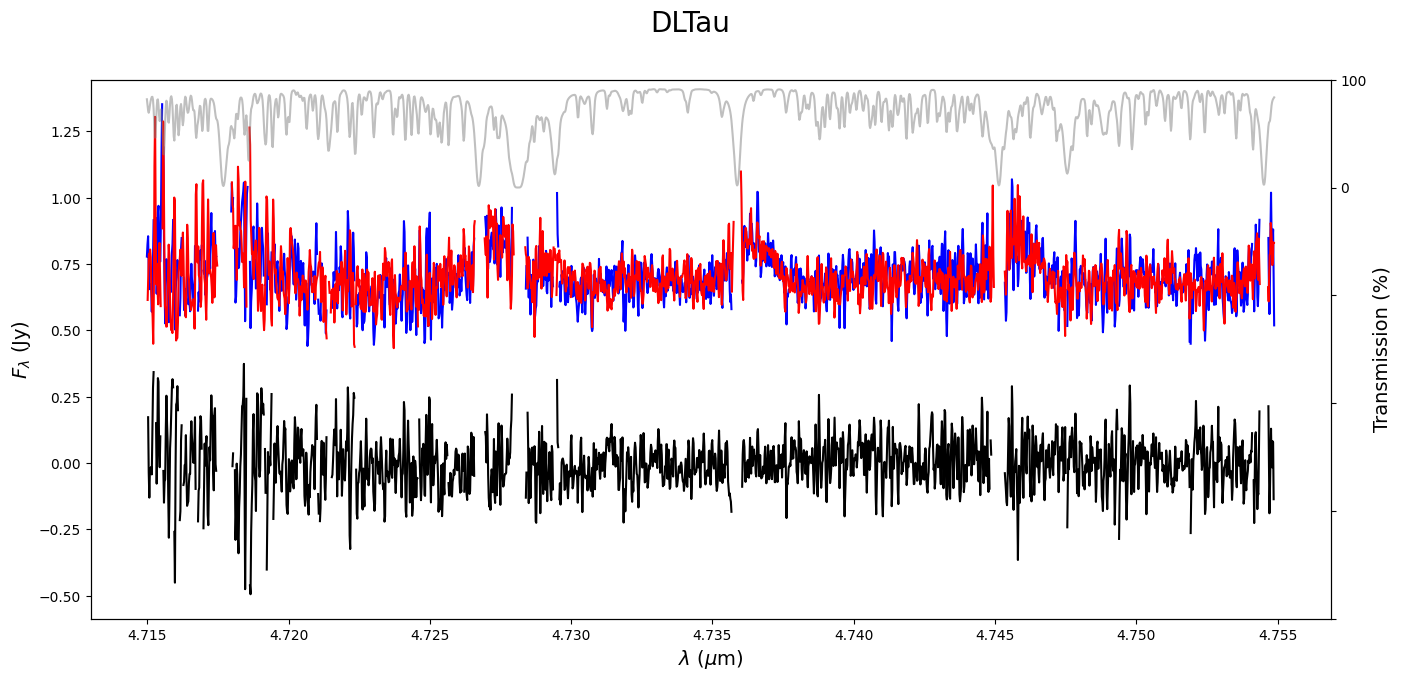

In [4]:
# plot just one order
fig, ax = plt.subplots(figsize=(16, 7))
order = 10
wl1 = data1[order, 0, :]
flux1 = data1[order, 1, :]
wl2 = data2[order, 0, :]
flux2 = data2[order, 1, :]
flux2i = interpolate.interp1d(wl2, flux2, bounds_error=False)

scale = np.nanmedian(flux1) / np.nanmedian(flux2)

ax.plot(wl1, flux1, color='b')
ax.plot(wl2, scale*flux2, color='r')
ax.plot(wl1, flux1-scale*flux2i(wl1), color='k')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$F_\lambda$ (Jy)', fontsize=14)

axr = ax.twinx()
axr.plot(wl1, 100*atrans(wl1), '-', color='gray', alpha=0.5)

axr.set_ylabel(r'Transmission (%)', fontsize=14)
axr.set_ylim(-400,100)
axr.set_yticks([-400,-300,-200,-100,0,100])
axr.set_yticklabels(['','','','','0','100'])

fig.suptitle(source, fontsize=20)
fig.savefig(source+'_SA.pdf', dpi=300)